### 决策树的构造

决策树的优缺点

- 优点：计算复杂度不高，输出结果易于理解，对中间值缺失不敏感，可以处理不相关特征数据。
- 缺点：可能会产生过度匹配的问题。
- 适用的数据类型：数值型和标称型。

在构造决策树时，需要解决的第一个问题就是，当前数据集上哪个特征在划分数据分类时起决定性作用。

创建分支的伪代码函数createBranch()如下所示：

    检测数据集中每个子项是否属于同一分类：
        if so
            return 类标签
        else
            寻找划分数据集的最好特征
            划分数据集
            创建分支节点
                for 每个划分的子集
                    调用函数createBranch并增加返回结果到分支节点中
            return 分支节点

决策树的一般流程

(1) 收集数据：可以使用任何方法。  
(2) 准备数据：树构造算法只适用于标称型数据，因此数值型数据必须离散化。  
(3) 分析数据：可以使用任何方法，构造树完成之后，我们应该检查图形是否符合预期。  
(4) 训练算法：构造树的数据结构。  
(5) 测试算法：使用经验树计算错误率。  
(6) 使用算法：此步骤可以适用于任何监督学习算法，而使用决策树可以更好地理解数据的内在含义。  

本章采用的决策树算法是ID3算法，用它来划分数据集，该算法处理如何划分数据集，何时停止划分数据集。**每次划分数据集时我们只选取一个特征属性**。

#### 信息增益

划分数据集的大原则是：**将无序的数据变得更加有序**。  
在划分数据集之前之后信息发生的变化称为信息增益。对于每个特征而言，划分数据集之后获得信息增益最高的特征就是最好的选择。

熵(entropy)定义为信息的期望值。如果待分类的事务可能划分在多个分类中，则符号$x_{i}$的信息定义为：  
$$l(x_{i}) = -log_{2}p(x_{i})$$  
其中，$p(x_{i})$是选择该分类的概率。

信息熵是所有类别所有可能值包含的信息期望值，公式如下：
$$H = - \sum_{i=1}^{n}p(x_{i})log_{2}p(x_{i})$$
其中n是分类的数目。

In [707]:
import trees

In [708]:
myDat, labels = trees.createDataSet()

In [709]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [710]:
labels

['no surfacing', 'flippers']

In [711]:
trees.calcShannonEnt(myDat)

0.9709505944546686

In [712]:
myDat[0][-1] = 'maybe'

In [713]:
myDat

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [714]:
trees.calcShannonEnt(myDat)

1.3709505944546687

另一个度量集合无序程度的方法是**基尼不纯度(Gini impurity)** ,简单地说就是从一个数据集中随机选取子项，度量其被错误分类到其他分组里的概率。 

#### 划分数据集

In [715]:
a = [1,2,3]

In [716]:
b = [4,5,6]

In [717]:
a.append(b)

In [718]:
a

[1, 2, 3, [4, 5, 6]]

In [719]:
a = [1,2,3]

In [720]:
a.extend(b)

In [721]:
a

[1, 2, 3, 4, 5, 6]

In [722]:
reload(trees)

<module 'trees' from 'trees.pyc'>

In [723]:
myDat, labels = trees.createDataSet()

In [724]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

In [725]:
trees.splitDataSet(myDat, 0, 0)

[[1, 'no'], [1, 'no']]

In [726]:
trees.splitDataSet(myDat, 0, 1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

信息增益是熵的减少或者是数据无序度的减少。

In [727]:
reload(trees)

<module 'trees' from 'trees.pyc'>

In [728]:
myDat, labels = trees.createDataSet()

In [729]:
trees.chooseBestFeatureToSplit(myDat)

0

In [730]:
myDat

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]

#### 递归构建决策树

**从数据集构造决策树的工作原理如下**：  
得到原始数据集，然后基于最好的属性值划分数据集，由于特征值可能多于两个，因此可能存在大于两个分支的数据集划分。第一次划分后，数据将被向下传递到树分支的下一个节点，在这个节点上，我们可以再次划分数据。

**递归结束的条件是**：  
程序遍历完所有划分数据集的属性，或者每个分支下的所有实例都具有相同的属性。

第一个结束条件使得算法可以终止，我们甚至可以设置算法可以划分的最大分组数目。后续章节介绍的其他决策树算法如C4.5和CART算法，在运行时并不总是在每次划分分组时都会消耗特征。**由于特征数目并不是在每次划分数据分组时都减少，因此这些算法在实际使用时可能引起一定的问题**。

类标签不唯一时采用**多数表决**的方法来确定该叶子节点的分类。

In [731]:
reload(trees)

<module 'trees' from 'trees.pyc'>

In [732]:
myDat, labels = trees.createDataSet()

In [733]:
myTree = trees.createTree(myDat, labels)

In [734]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

### 在Python中使用Matplotlib注解绘制树形图

**Matplotlib库提供了一个注解工具annotations，可以在数据图形上添加文本注释。**  
注解通常用于解释数据的内容。

In [735]:
import treePlotter

In [736]:
reload(treePlotter)

<module 'treePlotter' from 'treePlotter.py'>

yes
create
create 1


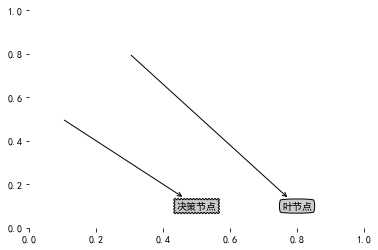

In [737]:
treePlotter.createPlotOrigin()

这里在使用matplotlib的annotation的时候出现了中文乱码，在代码中加入以下两行之后，添加了对应的字体就可以找到中文了。

    from pylab import *  
    mpl.rcParams['font.sans-serif'] = ['SimHei']

In [738]:
treePlotter.retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [739]:
myTree = treePlotter.retrieveTree(0)

In [740]:
treePlotter.getNumLeafs(myTree)

3

In [741]:
treePlotter.getTreeDepth(myTree)

2

绘制图形的x轴有效范围是0.0到1.0，y轴有效范围是0.0到1.0。

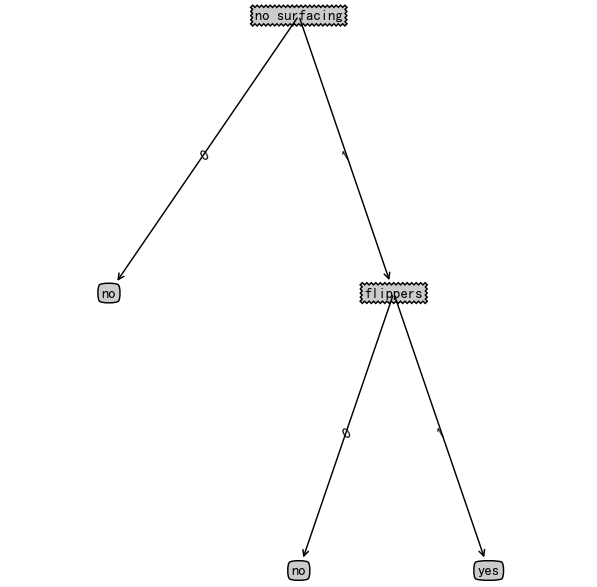

In [742]:
treePlotter.createPlot(myTree)

In [743]:
myTree['no surfacing'][3] = 'maybe'

In [744]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}, 3: 'maybe'}}

In [745]:
reload(treePlotter)

<module 'treePlotter' from 'treePlotter.pyc'>

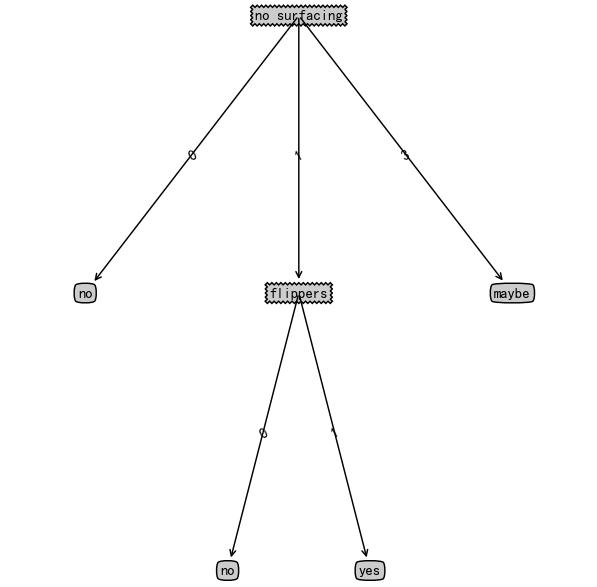

In [746]:
treePlotter.createPlot(myTree)

### 测试和存储分类器

In [747]:
myDat, labels = trees.createDataSet()

In [748]:
labels

['no surfacing', 'flippers']

In [749]:
myTree = treePlotter.retrieveTree(0)

In [750]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [751]:
trees.classify(myTree, labels, [1,0])

'no'

In [752]:
trees.classify(myTree, labels, [1,1])

'yes'

构造决策树非常耗时，为了节省计算时间，最好能够在每次执行分类时调用已经构造好的决策树。使用Python的pickle模块序列化对象，可以快速读取保存在磁盘上的对象。

In [753]:
trees.storeTree(myTree, 'classifierStorage.txt')

In [754]:
trees.grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

训练好的决策树可以保存在磁盘上，这也是其优点之一，k-近邻算法就无法持久化分类器。

### 示例：使用决策树预测隐形眼镜类型

In [755]:
fr = open('lenses.txt')

In [756]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]

In [757]:
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [758]:
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [759]:
lensesTree = trees.createTree(lenses, lensesLabels)

In [760]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

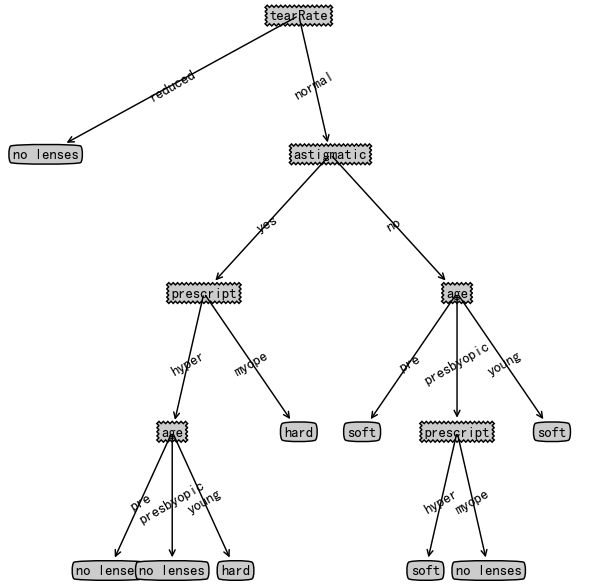

In [761]:
treePlotter.createPlot(lensesTree)

上图中决策树非常好地匹配了实验数据，但这些匹配项太多了，这种称为**过拟合(overfitting)** 。为了减少过拟合问题，我们可以剪裁决策树，去掉不必要的叶子节点。后面第九章将会学习另一个决策树构造算法CA